<a href="https://colab.research.google.com/github/irfixq/Avocado_King/blob/main/Avocado_King.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avocado King - Price & Sales Prediction using python

## System Configuration

In [ ]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib # collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt
%matplotlib inline

import warnings # ignore warnings
warnings.filterwarnings('ignore')

from google.colab import data_table # to show full data table in multiple pages
%load_ext google.colab.data_table
pd.set_option('max_rows', 30000)

In [ ]:
## Check system and python dependencies version
print("Python version: {}". format(sys.version))
print("NumPy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
print("matplotlib version: {}". format(matplotlib.__version__))


There are 2 options to get the data, either from GitHub or Google Drive.
In this case, I prefer to use Git Clone since it will be easier for user to access the repo instead of loading everything into their Google Drive or local.

In [ ]:
## Clone repo from GitHub
! git clone 'https://github.com/irfixq/Avocado_King'

In [ ]:
## Mount Google Drive to get data
## make sure you uploaded the folder into your Google Drive first

#from google.colab import drive 
#drive.mount('/content/drive')

In [ ]:
## get working directory
! pwd

## list all folders in working directory
! ls

In [ ]:
## change working directory to github folder
import os
os.chdir('/content/Avocado_King')


In [ ]:
## check working directory after change path
! pwd
! ls

## Data Pre-Processing

1. Data pre-processing for price and sales data
> * Read dataset  as pandas dataframe
> * Check for df dimension (rows, columns)
> * Check for column names and datatype
> * Show raw dataset table
> * Check for missing values
> * Handle missing values (if any)


2. Data Distribution
3. Data pre-processing for Google search data



#### Data pre-processing for price and sales data

In [ ]:
## see the shape of the dataset (rows, columns)
df_price = pd.read_csv('/content/Avocado_King/price-and-sales-data.csv')
df_price.shape

In [ ]:
## list all column names
df_price.columns

In [ ]:
## checking data type of each column
df_price.dtypes

In [ ]:
## see the dataset
df_price

In [ ]:
## check for missing values in dataset
print(f"Missing data:{df_price.isna().sum(axis=0).any()}") # TRUE represents the dataset has missing data

In [ ]:
## See the missing data in dataset
df_price_NA_check = df_price.isna()
df_price_NA_check

In [ ]:
## Save as new .csv table to see whole data / for download
df_price_NA_check.to_csv('df_price_NA_check.csv',sep=',')

In [ ]:
## there are 2 option to handle missing data
# option 1 = eliminate data point that contain missing values (not recommended as you might missed important data for other attribute)
# option 2 = substitue missing value with avg value of the attribute

dfnew_price = df_price.fillna(df_price.mean())

In [ ]:
## check for dataset after impute missing values
print(f"Missing data:{dfnew_price.isna().sum(axis=0).any()}")  # FALSE represent there is no missing values anymore in the dataset

In [ ]:
## see new dataset after substitue missing values / for download
dfnew_price.to_csv('dfnew_price.csv',sep=',')

In [29]:
## Check for outliers
# usually the mean should lies in between min and max values distribution
outliers = dfnew_price.describe()
outliers

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,year
count,25161.000000,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,25161.000000,25161.000000
mean,1.396018,9.170913e+05,2.981530e+05,2.958284e+05,2.246362e+04,2.950432e+05,2.124199e+05,7.589924e+04,4405.638467,2016.776877
std,0.377521,3.660879e+06,1.265327e+06,1.187469e+06,1.027392e+05,1.210964e+06,8.530163e+05,3.517944e+05,25357.440983,1.323978
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.120000,1.400096e+04,9.223600e+02,3.284480e+03,0.000000e+00,7.733600e+03,5.244730e+03,2.888900e+02,0.000000,2016.000000
50%,1.380000,1.363315e+05,1.225826e+04,3.093655e+04,2.520000e+02,5.105029e+04,3.537269e+04,4.757530e+03,0.000000,2017.000000
75%,1.620000,5.638524e+05,1.358825e+05,1.921057e+05,8.008860e+03,1.632409e+05,1.159123e+05,3.744130e+04,593.800000,2018.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,2.347299e+07,1.543625e+07,7.864297e+06,844929.830000,2019.000000


Based on above table, there is no outliers within the dataset

In [30]:
## Save as new .csv file / for download
outliers.to_csv('outliers.csv',sep=',')

#### Data Distribution
https://seaborn.pydata.org/tutorial/distributions.html

To understand how the variables are distributed. 
Question that can be answered by cisualizing the distributions of data are:
What range do the observations cover? 
* What is their central tendency? 
* Are they heavily skewed in one direction? 
* Is there evidence for bimodality? 
* Are there significant outliers? 
* Do the answers to these questions vary across subsets defined by other variables?

In [86]:
## Visualizing distributions of clean data
import seaborn as sns

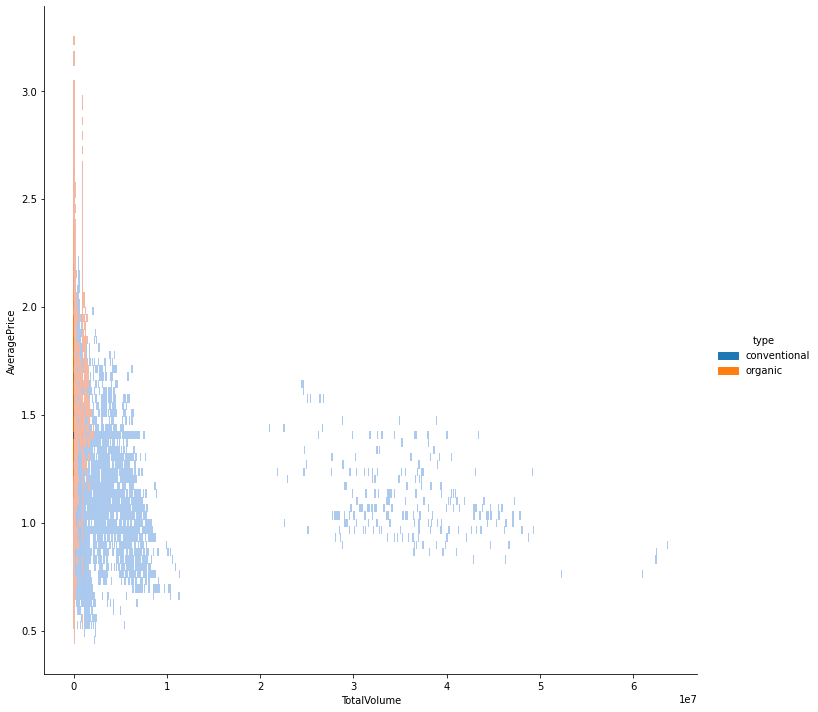

In [87]:
# Distribution plot of Avg price against total volume for each Avocade type
sns.displot(dfnew_price, x='TotalVolume', y='AveragePrice',hue='type',height=10)


**Bivariate Distribution Plot**
* Based on the bivariate distribution plot above, we can see that more conventional avocado has been sold compared to organic avocado.
* Also, organic avocado is seeling at higher price.




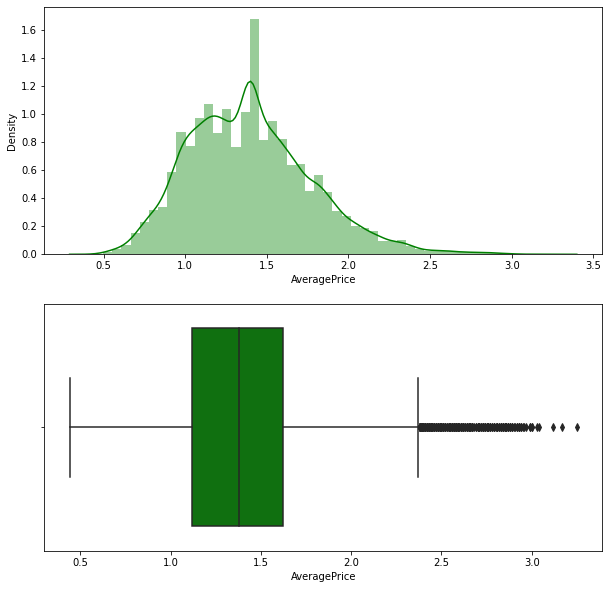

In [88]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

# distribution plot
# by default the kernel density estimation is TRUE; to see continuous density by smoothing the observation using Gaussian kernel fx
sns.distplot(dfnew_price.AveragePrice, color='green', ax=ax[0])

# box plot
sns.boxplot(dfnew_price.AveragePrice, color='green',ax=ax[1])

**Univariate Distribution Plot**
* Shown bimodal distribution which represents 2 mode; could be because we have 2 types of avocado

**Box Plot**
* Sh

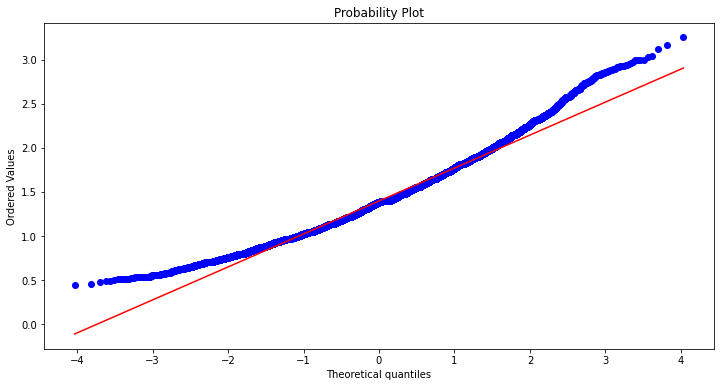

In [58]:
## see probability distribution of avg price
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
from scipy import stats
stats.probplot(dfnew_price['AveragePrice'], plot=ax)
plt.show()

In [89]:
print("Skewness: %f" % dfnew_price['AveragePrice'].skew())

Skewness: 0.602213
